In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data to a DataFrame
df = pd.read_csv("../data/pp_data.csv")

df['Date'] = pd.to_datetime(df['Date'])

In [6]:
immutable_columns = set()

# Group the data by 'Entity' (country)
grouped_df = df.groupby('Entity')

print(grouped_df.head())

# Iterate over each country
for country, country_df in grouped_df:
    # Iterate over each column
    for column in country_df.columns:
        if country_df[column].nunique() == 1:
            immutable_columns.add(column)


         Entity Continent  Latitude  Longitude  Average temperature per year  \
0       Albania    Europe     41.15      20.17                            14   
1       Albania    Europe     41.15      20.17                            14   
2       Albania    Europe     41.15      20.17                            14   
3       Albania    Europe     41.15      20.17                            14   
4       Albania    Europe     41.15      20.17                            14   
...         ...       ...       ...        ...                           ...   
34077  Zimbabwe    Africa    -19.02      29.15                            20   
34078  Zimbabwe    Africa    -19.02      29.15                            20   
34079  Zimbabwe    Africa    -19.02      29.15                            20   
34080  Zimbabwe    Africa    -19.02      29.15                            20   
34081  Zimbabwe    Africa    -19.02      29.15                            20   

       Hospital beds per 1000 people  M

In [7]:
# Column set of DataFrame
column_set = set(df.columns)
print(column_set)
print(immutable_columns)
print(column_set - immutable_columns)

{'Continent', 'Hospital beds per 1000 people', 'Median age', 'Cases', 'Deaths', 'Population aged 65 and over (%)', 'Entity', 'Daily cases', 'Latitude', 'Average temperature per year', 'Medical doctors per 1000 people', 'Daily tests', 'Daily deaths', 'Date', 'Longitude', 'Tests', 'GDP/Capita', 'Population'}
{'Continent', 'Hospital beds per 1000 people', 'Median age', 'Population aged 65 and over (%)', 'Entity', 'Latitude', 'Average temperature per year', 'Medical doctors per 1000 people', 'Longitude', 'GDP/Capita', 'Population'}
{'Cases', 'Daily cases', 'Daily deaths', 'Daily tests', 'Date', 'Tests', 'Deaths'}


In [8]:
# Describe the data.
df.describe()


,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,Daily cases,Daily deaths,Tests
count,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,34423.000000,3.442300e+04,34423.000000,34423.000000,34423,3.442300e+04,3.442300e+04,34423.000000,34423.000000,34423.000000,3.442300e+04
mean,22.955893,17.795300,17.709584,3.164853,2.075139,20138.116553,5.231200e+07,33.063243,11.015687,2020-08-26 21:59:08.755192832,3.662950e+04,3.130841e+05,8055.172937,2633.513203,58.240421,4.545512e+06
min,-40.900000,-106.350000,-2.000000,0.300000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,2020-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,7.950000,-8.220000,11.000000,1.380000,0.790000,3853.100000,4.813608e+06,27.000000,5.000000,2020-05-27 00:00:00,1.192000e+03,2.254500e+03,36.000000,19.000000,0.000000,8.017300e+04
50%,26.340000,20.170000,20.000000,2.500000,1.890000,9912.300000,1.585057e+07,33.000000,10.000000,2020-08-27 00:00:00,4.797000e+03,2.327100e+04,360.000000,246.000000,3.000000,4.856090e+05
75%,45.940000,47.480000,25.000000,4.500000,3.200000,29820.600000,4.483116e+07,41.000000,17.000000,2020-11-28 00:00:00,1.867100e+04,1.474095e+05,3093.000000,1204.000000,24.000000,2.061884e+06
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2021-02-28 00:00:00,2.945871e+06,2.860567e+07,513091.000000,823225.000000,4398.000000,3.328386e+08
std,26.536010,62.883271,7.982710,2.500363,1.529285,22755.878155,1.502439e+08,8.584187,6.820127,NaN,1.431851e+05,1.478163e+06,29748.754238,12815.663350,219.751297,2.054686e+07


In [9]:
# Bases on the 'Deaths' column which shows the deaths for a country to that day, calculate the daily deaths by subtracting the previous day's deaths from the current day's deaths.
df['Deaths'] = df.groupby('Entity')['Deaths'].diff().fillna(0)

In [10]:
# Average cases per data per country
df.groupby('Entity')['Cases'].max().sort_values(ascending=False)

Entity
United States     28605669.0
India             11112241.0
Russia             4198400.0
United Kingdom     4188827.0
France             3747263.0
                     ...    
Togo                  6901.0
Iceland               6049.0
New Zealand           2378.0
Bhutan                 867.0
Fiji                    59.0
Name: Cases, Length: 93, dtype: float64

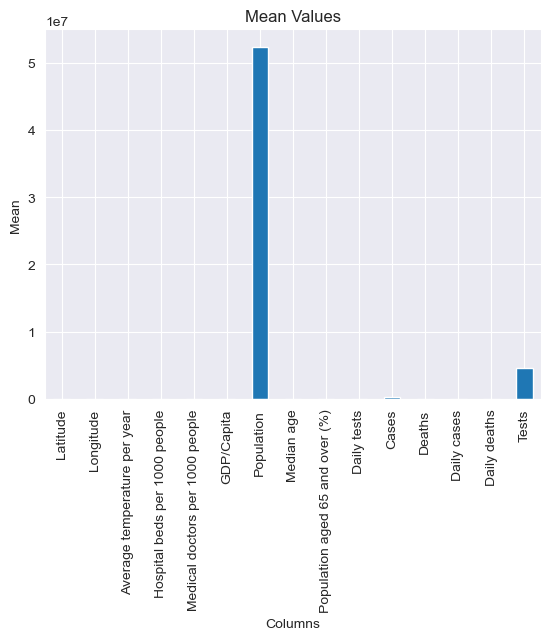

In [11]:
# Bar Chart of Mean Values
mean_values = df.mean(numeric_only=True)
mean_values.plot(kind='bar')
plt.title('Mean Values')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.show()


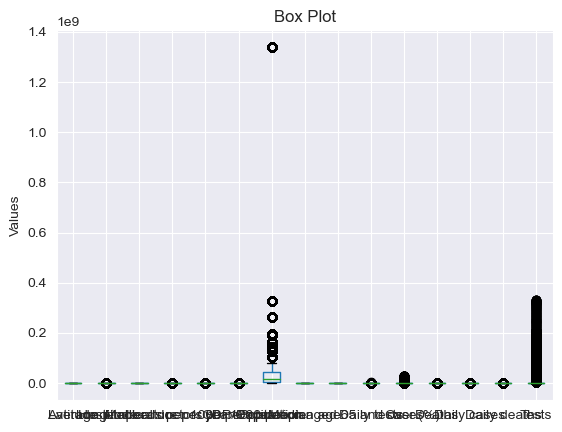

In [12]:
# Box Plot
df.boxplot()
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()


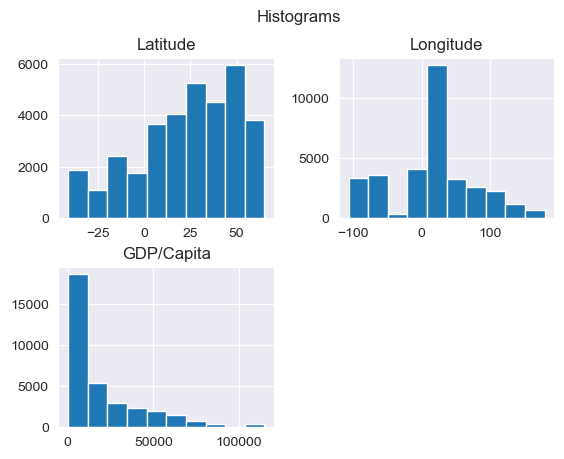

In [13]:
# Histograms
df[['Latitude', 'Longitude', 'GDP/Capita']].hist()
plt.suptitle('Histograms')
plt.show()


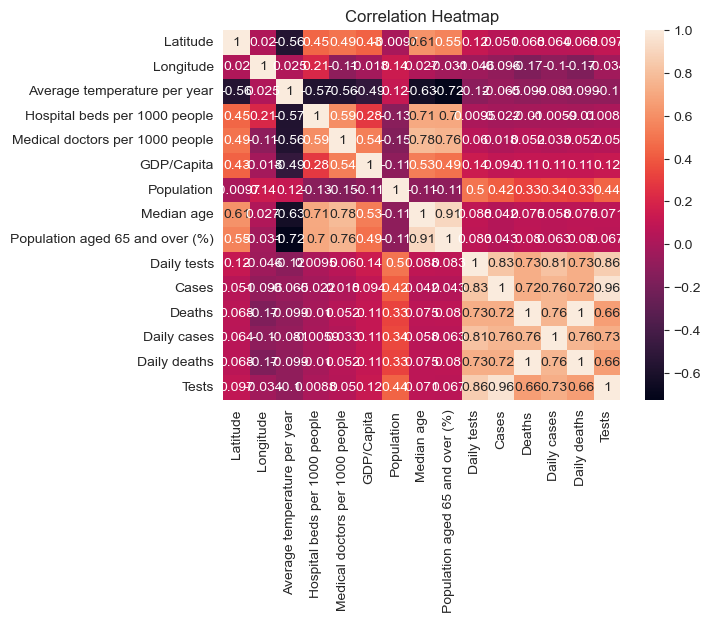

In [14]:
# Heatmap of Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


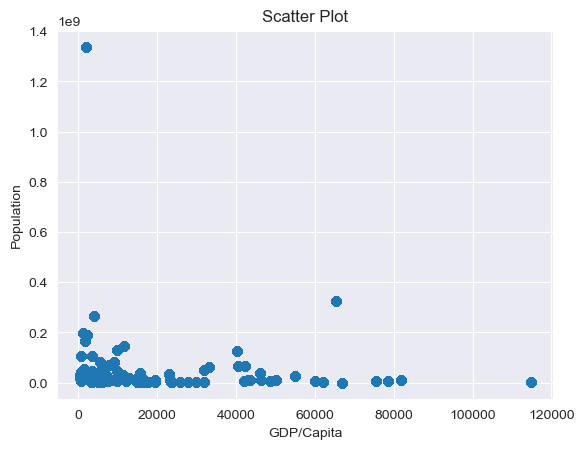

In [15]:
# Scatter Plot
plt.scatter(df['GDP/Capita'], df['Population'])
plt.title('Scatter Plot')
plt.xlabel('GDP/Capita')
plt.ylabel('Population')
plt.show()

In [16]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])


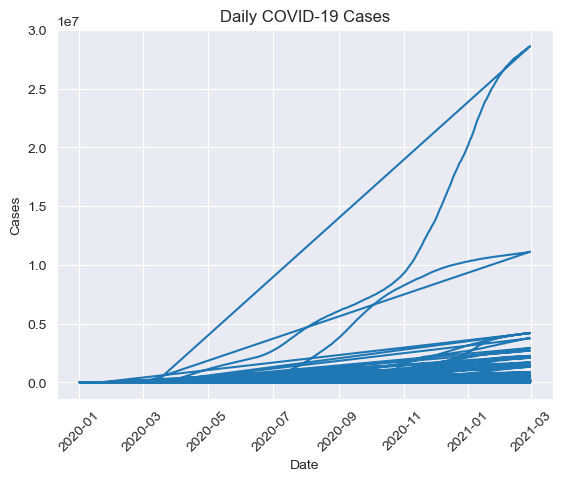

In [17]:
# Line plot of daily cases
plt.plot(df['Date'], df['Cases'])
plt.title('Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()


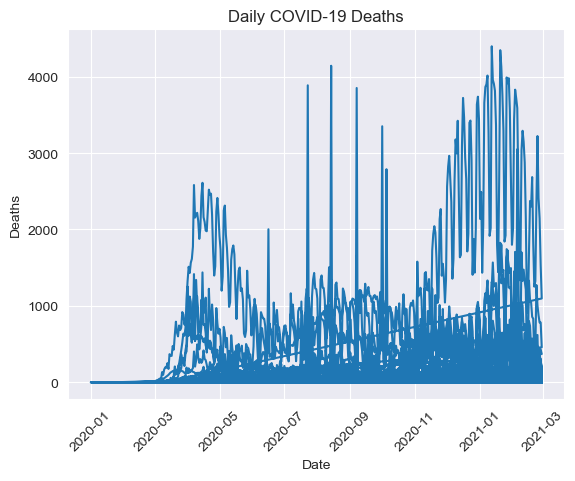

In [18]:
# Line plot of daily deaths
plt.plot(df['Date'], df['Deaths'])
plt.title('Daily COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()


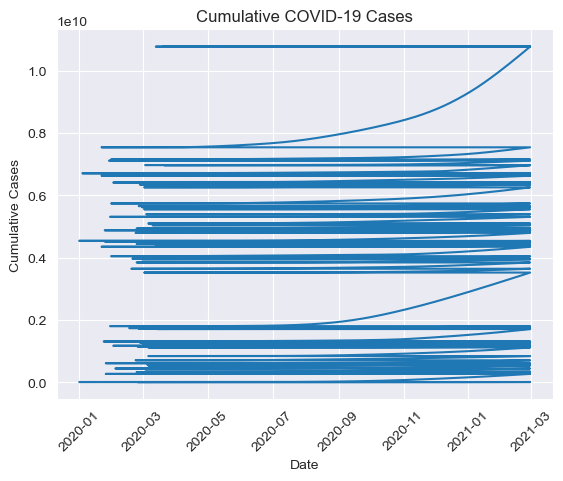

In [19]:
# Calculate and visualize cumulative cases over time
df['Cumulative Cases'] = df['Cases'].cumsum()
plt.plot(df['Date'], df['Cumulative Cases'])
plt.title('Cumulative COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45)
plt.show()


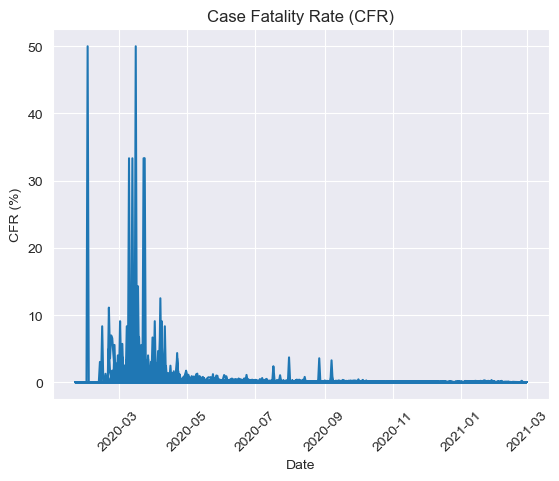

In [20]:
# Calculate and visualize case fatality rate (CFR)
df['CFR'] = df['Deaths'] / df['Cases'] * 100
plt.plot(df['Date'], df['CFR'])
plt.title('Case Fatality Rate (CFR)')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.show()


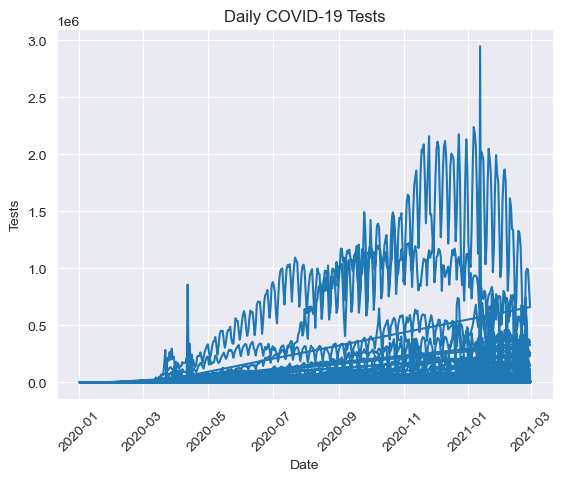

In [21]:
# Calculate and visualize daily tests conducted
plt.plot(df['Date'], df['Daily tests'])
plt.title('Daily COVID-19 Tests')
plt.xlabel('Date')
plt.ylabel('Tests')
plt.xticks(rotation=45)
plt.show()


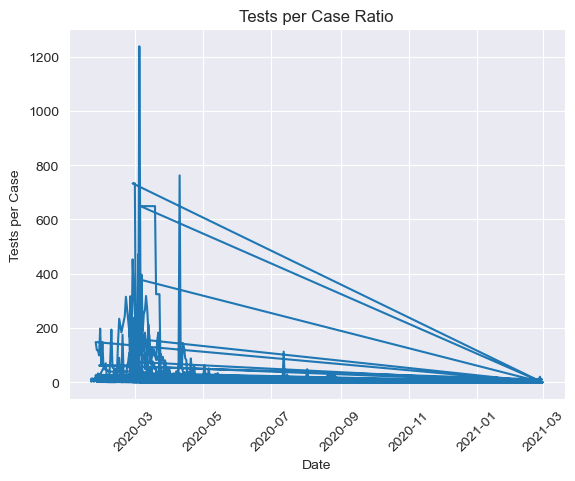

In [22]:
# Calculate and visualize tests per case ratio
df['Tests per Case'] = df['Daily tests'] / df['Cases']
plt.plot(df['Date'], df['Tests per Case'])
plt.title('Tests per Case Ratio')
plt.xlabel('Date')
plt.ylabel('Tests per Case')
plt.xticks(rotation=45)
plt.show()